In [30]:
# for importing dataset
import numpy as np
import pandas as pd
    
# for performing text clustering    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# for providing the path
import os

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [40]:
data = pd.read_csv(r"clean-boatos.org-2021-01-12.csv", encoding="utf-8")
data.shape


(714, 6)

In [41]:
# data = data.rename(columns={'Unnamed': 'ID'})
data.columns


Index(['Unnamed: 0', 'link', 'date', 'title', 'text', 'classification'], dtype='object')

In [43]:
data['Length'] = data['title'].apply(len)

In [44]:
# getting the length of the text as another feature
data.groupby('Length').describe().head(20)

Unnamed: 0                                                        \
            count        mean         std    min     25%    50%     75%   
Length                                                                    
46            1.0  848.000000         NaN  848.0  848.00  848.0  848.00   
47            5.0  710.400000   89.226117  669.0  670.00  671.0  672.00   
48            2.0  917.500000    0.707107  917.0  917.25  917.5  917.75   
50            2.0  461.500000  637.103210   11.0  236.25  461.5  686.75   
51            1.0   13.000000         NaN   13.0   13.00   13.0   13.00   
52            1.0  920.000000         NaN  920.0  920.00  920.0  920.00   
54            3.0  184.333333  137.121601   26.0  144.50  263.0  263.50   
55            2.0  513.000000  511.945310  151.0  332.00  513.0  694.00   
56            2.0   95.000000   41.012193   66.0   80.50   95.0  109.50   
57            2.0  879.500000    0.707107  879.0  879.25  879.5  879.75   
58           11.0  237.181818  282.374510    5.0   83.00  120.0  214.50   
59            4.0  123.000000   16.753109  108.0  108.75  123.0  137.25   
60           14.0  314.142857  324.221638   24.0   93.25  146.5  334.75   
61            8.0  305.500000  299.970951   22.0   60.50  208.5  510.75   
62           11.0  524.272727  371.004607  118.0  147.50  778.0  844.00   
63           12.0  279.916667  221.750662   25.0  105.00  264.5  456.25   
64           13.0  623.153846  336.890646    2.0  393.00  797.0  876.00   
65            3.0  209.666667  263.122278   43.0   58.00   73.0  293.00   
66            9.0  320.222222  301.706719   34.0  116.00  136.0  510.00   
67           19.0  381.842105  183.447620  130.0  251.50  333.0  531.50   

              classification                                     
          max          count mean  std  min  25%  50%  75%  max  
Length                                                           
46      848.0            1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0  
47      870.0            5.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
48      918.0            2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
50      912.0            2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
51       13.0            1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0  
52      920.0            1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0  
54      264.0            3.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
55      875.0            2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
56      124.0            2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
57      880.0            2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
58      888.0           11.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
59      138.0            4.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
60      914.0           14.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
61      858.0            8.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
62      910.0           11.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
63      679.0           12.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
64      925.0           13.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
65      513.0            3.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
66      906.0            9.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
67      866.0           19.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [45]:
data.head()

,Unnamed: 0,link,date,title,text,classification,Length
0,1,https://www.boatos.org/saude/cadastro-conecte-...,2021-01-09 21:02:08,Cadastro do Conecte SUS será obrigatório para ...,"Pessoal, todo mundo precisa se cadastrar no co...",1,73
1,2,https://www.boatos.org/mundo/cristina-kirchner...,2021-01-09 14:32:34,Cristina Kirchner tomou vacina da Covid-19 sem...,"A vice-presidente argentina, é a primeira mul...",1,64
2,3,https://www.boatos.org/saude/gerson-camarotti-...,2021-01-08 19:13:52,Gerson Camarotti pediu cassação do registro de...,ESTE SAFADO ESTA PEDINDO PARA OS CONSELHOS T...,1,97
3,4,https://www.boatos.org/saude/secretario-saude-...,2021-01-08 16:33:39,Secretário de Saúde de Minas Gerais escreve me...,Mensagem do Secretário Estado Saúde de Minas ...,1,72
4,5,https://www.boatos.org/mundo/presidente-pais-l...,2021-01-07 17:51:58,Presidente de país do Leste Europeu se vacinou...,"OLHEM ISSO, OS GOVERNANTES COMO SEU DÓRIA, EST...",1,58


# Data Visualization

/tmp/ipykernel_21841/2616465629.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Length'], color = 'purple')


Text(0.5, 1.0, 'The Distribution of Length over the Texts')

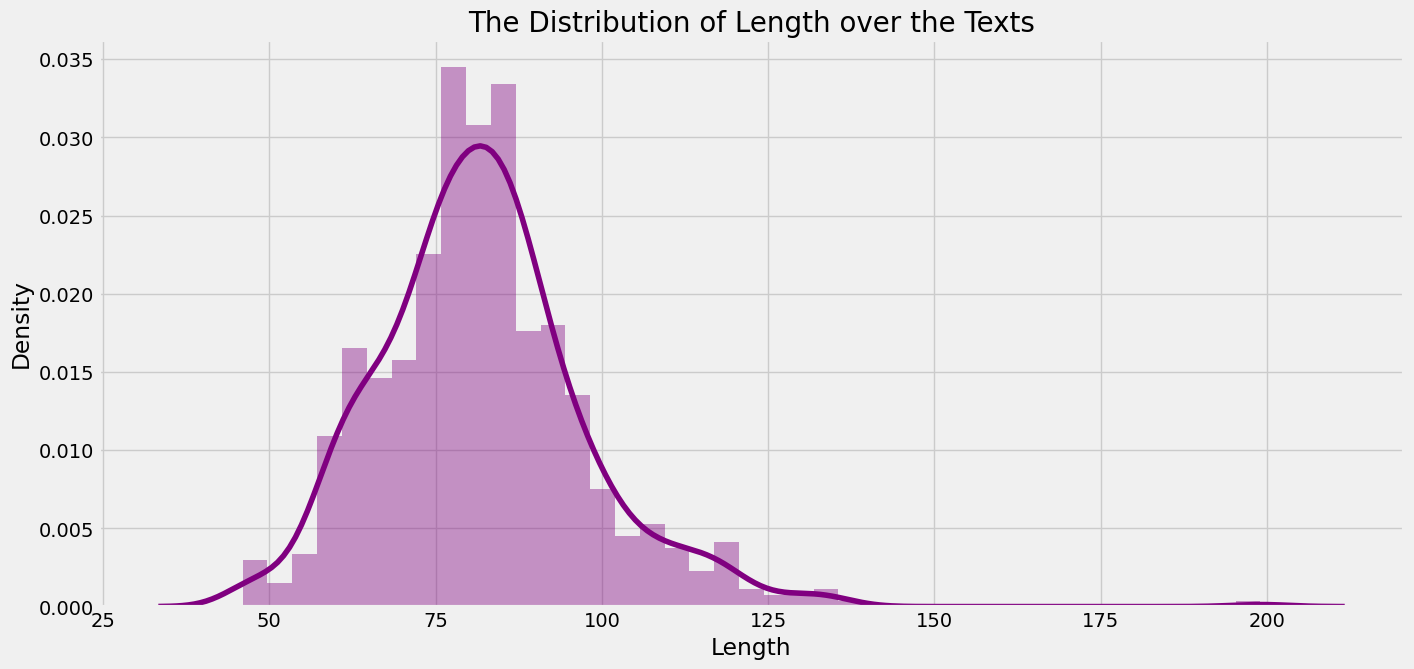

In [46]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(data['Length'], color = 'purple')
plt.title('The Distribution of Length over the Texts', fontsize = 20)

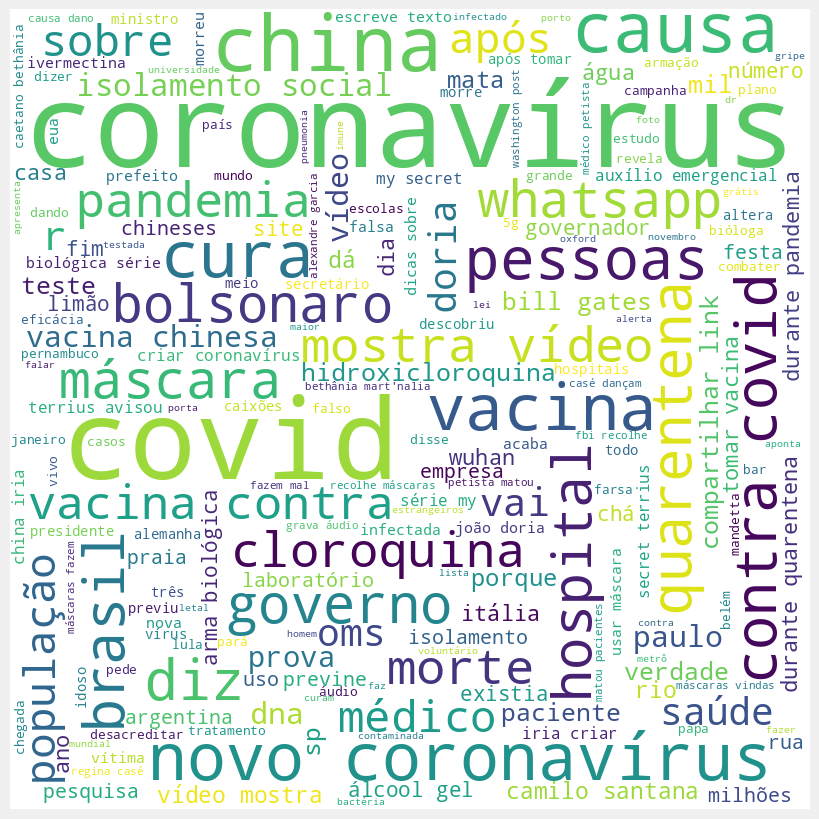

In [48]:
from wordcloud import WordCloud


comment_words = ''
custom_stop_words = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam']

for val in data.title:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
        
    comment_words += " ".join(tokens) + " "
wordcloud = WordCloud(width = 800, height = 800, background_color ='white',
                stopwords = custom_stop_words,
                min_font_size = 10).generate(comment_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('title_wordcloud.png')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

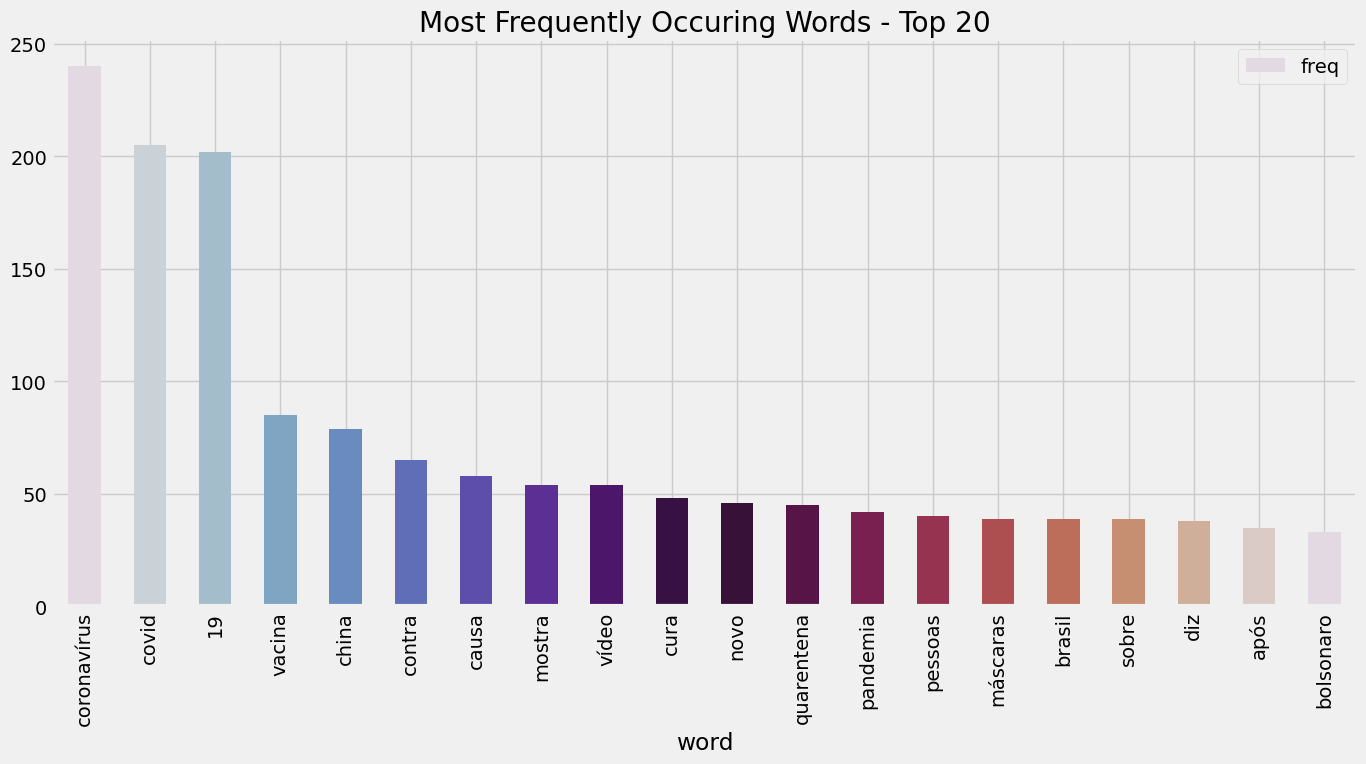

In [57]:


from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words=custom_stop_words)
words = cv.fit_transform(data['title'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")



Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

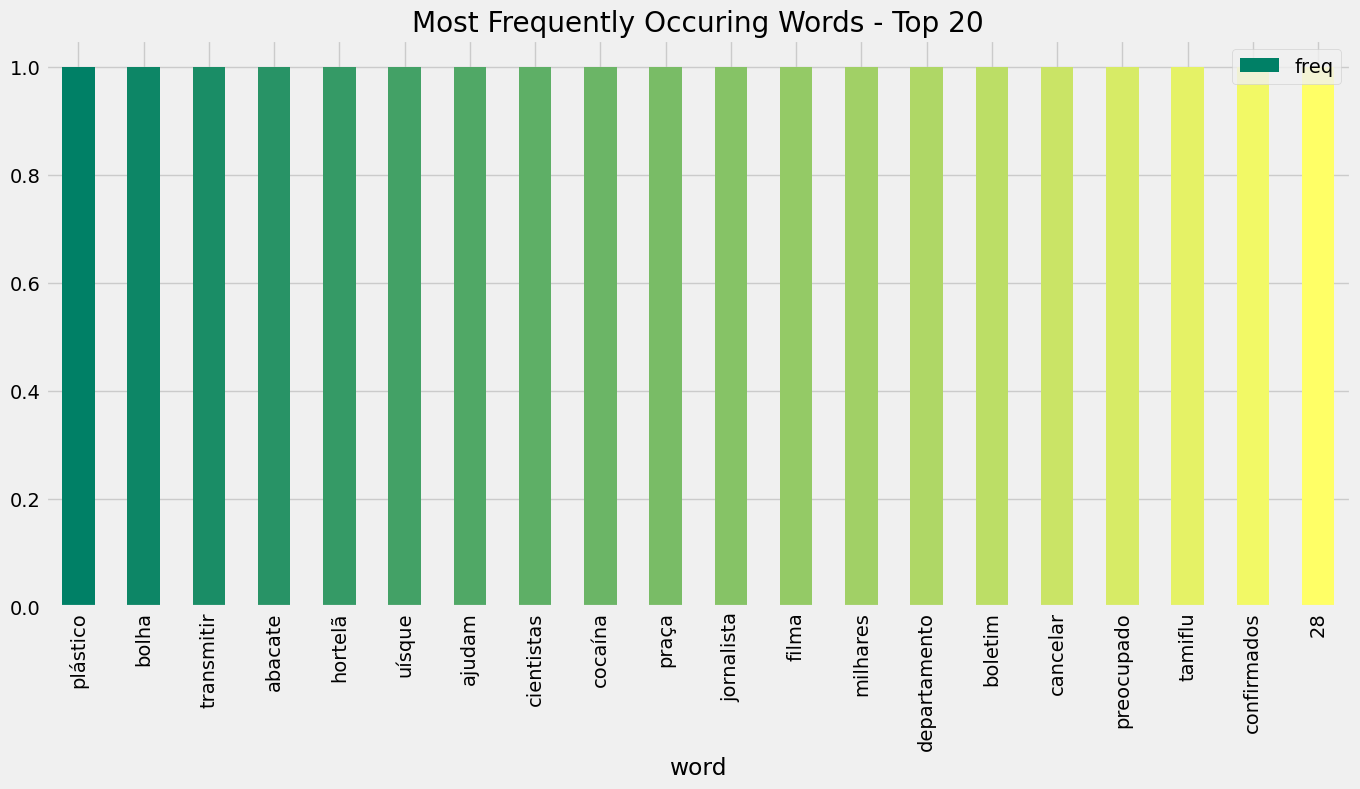

In [58]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words=custom_stop_words)
words = cv.fit_transform(data['title'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

# Data Preprocessing

In [61]:


# cleaning the texts
# importing the libraries for Natural Language Processing

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/daniela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:


# cleaning the data

corpus = []

for i in range(0, 200):
    review = re.sub('[^a-zA-Z]', ' ', data['title'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(custom_stop_words)]
    review = ' '.join(review)
    corpus.append(review)



In [65]:


# vectorizing the data using Tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=custom_stop_words, max_features = 2000)
X = vectorizer.fit_transform(data['title'])

# getting the shape of X
print("Shape of X :", X.shape)



Shape of X : (714, 2000)


# Clustering

## k-means

In [71]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)



KMeans(max_iter=100, n_clusters=4, n_init=1)

In [72]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

# print("\n")
# print("Prediction")

# # prediction on the Text no. 1
# Y = vectorizer.transform(["Claxton hunting first major medal British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid.The 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. I am quite confident, said Claxton. But I take each race as it comes. As long as I keep up my training but not do too much I think there is a chance of a medal.Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week's Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.For the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous seasons, the 25-year-old also contested the long jump but since moving from Colchester to London she has re-focused her attentions. Claxton will see if her new training regime pays dividends at the European Indoors which take place on 5-6 March"])
# prediction = model.predict(Y)
# print("Cluster number :", prediction)

# # Prediction on the Text no.2
# Y = vectorizer.transform(["O Sullivan could run in Worlds Sonia O'Sullivan has indicated that she would like to participate in next month's World Cross Country Championships in St Etienne.Athletics Ireland have hinted that the 35-year-old Cobh runner may be included in the official line-up for the event in France on 19-20 March. Provincial teams were selected after last Saturday's Nationals in Santry and will be officially announced this week. O'Sullivan is at present preparing for the London marathon on 17 April. The participation of O'Sullivan, currentily training at her base in Australia, would boost the Ireland team who won the bronze three years agio. The first three at Santry last Saturday, Jolene Byrne, Maria McCambridge and Fionnualla Britton, are automatic selections and will most likely form part of the long-course team. OSullivan will also take part in the Bupa Great Ireland Run on 9 April in Dublin."])
# prediction = model.predict(Y)
# print("Cluster number :", prediction)

Top terms per cluster:
Cluster 0:
 mata
 água
 limão
 coronavírus
 curam
 19
 covid
 ivermectina
 aspirina
 suco
Cluster 1:
 covid
 19
 cura
 vacina
 contra
 coronavírus
 novo
 sobre
 tomar
 mostra
Cluster 2:
 china
 máscaras
 coronavírus
 criar
 arma
 biológica
 infectadas
 my
 iria
 série
Cluster 3:
 coronavírus
 quarentena
 causa
 vídeo
 mostra
 whatsapp
 diz
 durante
 bolsonaro
 pandemia


## LDA

In [99]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
if word not in custom_stop_words] for doc in texts]

dt = data['title'].values
data_words = list(sent_to_words(dt))# remove stop words
data_words = remove_stopwords(data_words)
print(data_words)

[['cadastro', 'conecte', 'sus', 'sera', 'obrigatorio', 'vacinar', 'contra', 'covid'], ['cristina', 'kirchner', 'tomou', 'vacina', 'covid', 'agulha', 'mascara'], ['gerson', 'camarotti', 'pediu', 'cassacao', 'registro', 'medicos', 'receitam', 'antivirais', 'contra', 'covid'], ['secretario', 'saude', 'minas', 'gerais', 'escreve', 'mensagem', 'chegamos', 'pico'], ['presidente', 'pais', 'leste', 'europeu', 'vacinou', 'agulha'], ['enfermeira', 'khalilah', 'mitchell', 'paralisia', 'facial', 'apos', 'tomar', 'vacina'], ['enfermeira', 'khalilah', 'mitchell', 'paralisia', 'facial', 'apos', 'tomar', 'vacina'], ['enfermeira', 'khalilah', 'mitchell', 'paralisia', 'facial', 'apos', 'tomar', 'vacina'], ['joao', 'doria', 'fechou', 'ceasa', 'ceagesp', 'sao', 'paulo'], ['faustao', 'internado', 'uti', 'causa', 'covid'], ['caetano', 'bethania', 'mart', 'nalia', 'regina', 'case', 'dancam', 'festa', 'reveillon'], ['caetano', 'bethania', 'mart', 'nalia', 'regina', 'case', 'dancam', 'festa', 'reveillon'], ['c

In [100]:
import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(data_words)# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [101]:
from pprint import pprint# number of topics
num_topics = 10# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.040*"coronavirus" + 0.037*"covid" + 0.016*"nao" + 0.015*"novo" + '
  '0.012*"vacina" + 0.012*"contra" + 0.010*"cura" + 0.010*"causa" + '
  '0.010*"prova" + 0.009*"china"'),
 (1,
  '0.027*"covid" + 0.019*"coronavirus" + 0.014*"cloroquina" + '
  '0.013*"pacientes" + 0.013*"pandemia" + 0.012*"whatsapp" + 0.009*"hospital" '
  '+ 0.008*"sobre" + 0.007*"eficacia" + 0.007*"desacreditar"'),
 (2,
  '0.037*"coronavirus" + 0.021*"china" + 0.020*"pessoas" + 0.011*"causa" + '
  '0.010*"vacina" + 0.010*"quarentena" + 0.010*"covid" + 0.009*"criar" + '
  '0.009*"durante" + 0.008*"vai"'),
 (3,
  '0.041*"covid" + 0.013*"coronavirus" + 0.011*"vacina" + 0.009*"contra" + '
  '0.008*"mostra" + 0.008*"causa" + 0.007*"vai" + 0.007*"pastor" + 0.007*"rio" '
  '+ 0.007*"sobre"'),
 (4,
  '0.027*"coronavirus" + 0.021*"vacina" + 0.020*"covid" + 0.013*"causa" + '
  '0.012*"cura" + 0.010*"contra" + 0.009*"tomar" + 0.008*"apos" + '
  '0.008*"quarentena" + 0.008*"nao"'),
 (5,
  '0.025*"coronavirus" + 0.024*"c

In [110]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(''+str(num_topics))
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/home/daniela/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.015151 -0.054079       1        1  12.157515
0      0.104456  0.089414       2        1  11.716406
4      0.045590 -0.001391       3        1  11.028208
2     -0.097736  0.052238       4        1  10.659212
5     -0.098414  0.023327       5        1  10.233700
1     -0.025542 -0.077676       6        1   9.512823
6     -0.046385  0.075461       7        1   9.353654
9      0.072889  0.053323       8        1   9.272661
3      0.052388 -0.093917       9        1   8.392028
7     -0.022397 -0.066699      10        1   7.673794, topic_info=        Term        Freq       Total Category  logprob  loglift
3      covid  158.000000  158.000000  Default  30.0000  30.0000
90     prova   14.000000   14.000000  Default  29.0000  29.0000
105   mostra   41.000000   41.000000  Default  28.0000  28.0000
153    china   60.000000   60.000000  Default  27.0000  27.0000
13    vacina   65.000000   65.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
23   escreve    2.361234    9.890200  Topic10  -5.3140   1.1350
171  chinesa    2.352223   13.886940  Topic10  -5.3178   0.7918
67      cura    2.168667   38.183908  Topic10  -5.3990  -0.3009
375      mil    2.168519   11.637875  Topic10  -5.3991   0.8871
773     novo    2.168476   37.074836  Topic10  -5.3991  -0.2716

[679 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
733       4  0.906482   aborto
475       2  0.765063   acerta
475       9  0.255021   acerta
1383      3  0.626049  acertou
1383      6  0.313025  acertou
...     ...       ...      ...
432       8  0.632718  xingado
383       9  0.684016     yale
790       1  0.277835      zap
790      10  0.555669      zap
946       8  0.632720   zerado

[1200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 1, 5, 3, 6, 2, 7, 10, 4, 8])

## TF-IDF

In [111]:
import nltk
import re

In [126]:
data2 = pd.read_csv(r"clean-boatos.org-2021-01-12.csv", encoding="utf-8")
dataset = data2['title'].values
for i in range (len(dataset)):
    dataset[i] = dataset[i].lower()

    
print(dataset)

['cadastro do conecte sus será obrigatório para se vacinar contra covid-19 '
 'cristina kirchner tomou vacina da covid-19 sem agulha e máscara '
 'gerson camarotti pediu cassação do registro de médicos que receitam “antivirais” contra covid-19 '
 'secretário de saúde de minas gerais escreve mensagem “chegamos ao pico” '
 'presidente de país do leste europeu se vacinou sem agulha '
 'enfermeira khalilah mitchell teve paralisia facial após tomar vacina '
 'enfermeira khalilah mitchell teve paralisia facial após tomar vacina '
 'enfermeira khalilah mitchell teve paralisia facial após tomar vacina '
 'joão doria fechou o ceasa (ceagesp), em são paulo '
 'faustão foi internado na uti por causa da covid-19 '
 "caetano, bethânia, mart'nalia e regina casé dançam em festa de réveillon 2021 "
 "caetano, bethânia, mart'nalia e regina casé dançam em festa de réveillon 2021 "
 "caetano, bethânia, mart'nalia e regina casé dançam em festa de réveillon 2021 "
 "caetano, bethânia, mart'nalia e regina c

In [ ]:
teste = set(dataset)
print(teste)

In [142]:
from nltk.tokenize import  word_tokenize 

# michael = []
# for word in dataset:
#     for palavra in word_tokenize(word):
#         print(palavra)